In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

C:\Users\jites\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jites\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df_raw = pd.read_csv('C:/Users/jites/Desktop/AIMC Novice/week 7/datasets_4458_8204_winequality-red.csv')

In [4]:
df_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Missing Values

In [6]:
miss1 = dict()
for c in df_raw.columns[:11]:
    miss1[c] = 0
    for k in df_raw[c].isnull():
        if(k==True):
            miss1[c] = miss1[c].get(c,0) + 1
print(miss1)

{'fixed acidity': 0, 'volatile acidity': 0, 'citric acid': 0, 'residual sugar': 0, 'chlorides': 0, 'free sulfur dioxide': 0, 'total sulfur dioxide': 0, 'density': 0, 'pH': 0, 'sulphates': 0, 'alcohol': 0}


# Describing variables

In [7]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Dependent variable - Quality of wine

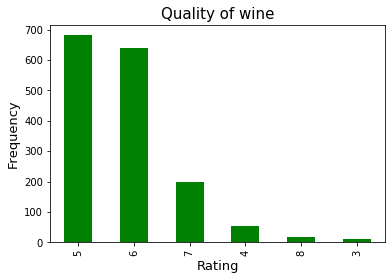

In [8]:
plt.title("Quality of wine", fontsize=15)
plt.xlabel("Rating", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
df_raw.quality.value_counts().plot.bar(color='green')

### Inference
 -  It is noted that the ratings 5 and 6 are the most common ratings and the frequency distriution of the higher ratings, i.e. 7 and 8 were very less.

In [9]:
df_raw.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


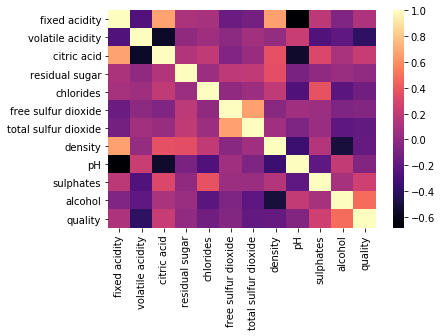

In [10]:
sns.heatmap(df_raw.corr(), cmap='magma')

### Inference from correlation
 -  It is noted that <b>citric acid and fixed acidity, free sulfur dioxide and total sulfur dioxide and density and fixed acidity</b> were correlated to some extent.
 -  Hence, one of the feature from these pairs can be chosen to be eliminated to reduce dimensionalilty.
 - It is also noted that <b>alcohol content</b> has the <b>strongest positive</b> correlation with the <b>wine quality</b> and on the other hand volatile acidity has the <b>strongest negative</b> correlation with the wine quality.

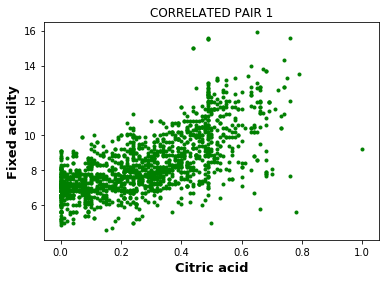

In [11]:
plt.scatter(df_raw['citric acid'], df_raw['fixed acidity'], marker='.', color='green')
plt.xlabel("Citric acid", fontsize=13, fontweight='bold')
plt.ylabel("Fixed acidity", fontsize=13, fontweight='bold')
plt.title('CORRELATED PAIR 1')
plt.show()

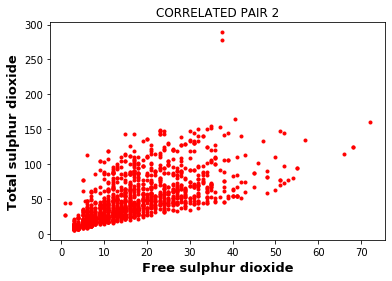

In [15]:
plt.scatter(df_raw['free sulfur dioxide'], df_raw['total sulfur dioxide'], marker='.', color='red')
plt.xlabel("Free sulphur dioxide", fontsize=13, fontweight='bold')
plt.ylabel("Total sulphur dioxide", fontsize=13, fontweight='bold')
plt.title('CORRELATED PAIR 2')
plt.show()

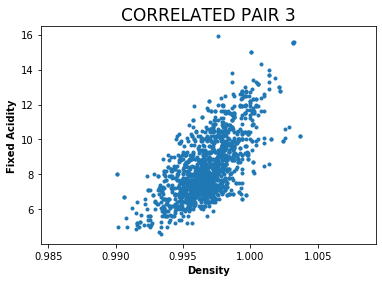

In [16]:
plt.scatter(df_raw['density'],df_raw['fixed acidity'], marker='.')
plt.xlabel("Density",fontweight = 'bold')
plt.ylabel("Fixed Acidity", fontweight = 'bold')
plt.title("CORRELATED PAIR 3",fontsize = 17)
plt.show()

In [17]:
corr_cols = ['citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'fixed acidity']

## Splitting dataset
 - The dataset is transformed into a dataset with a binary column with value <b>1 for quality >= 7 and 0 otherwise</b>.
 - The dataset is named <b>data_cls</b> as a classification model is applied to the dataset to predict its <b>goodness</b>.

In [27]:
good = []
for k in df_raw.quality:
    if(k>=7):
        good.append(1)
    else:
        good.append(0)

data_cls = df_raw.drop('quality', axis=1)
data_cls['good'] = good
data_cls.head(n=6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


## Classification Model
 - In this model K nearest neighbours classification algorithm is used to classify wine as good(rating>=7) or bad(rating<7).
 - The classifier is iterated over neighbours and a graph is plotted for the f1 square and acuuracy of model.
 - The area under ROC curve is also evaluated for different models.

In [28]:
data_cls.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## ANALYSIS OF FEATURES
 - The probability distributions of features of the dataset are plotted pertaining to their classes
 - The <b>CYAN</b> plot shows distribution which has the good feature as <b>True</b>
 - The <b>GREY</b> distribution has the good feature as <b>False</b>

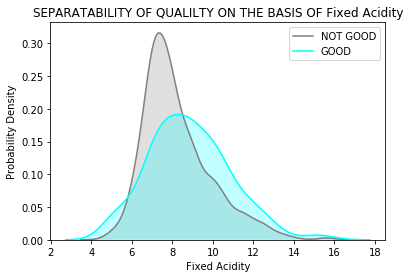

In [30]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['fixed acidity'], shade = True, color='grey', label="NOT GOOD")
sns.kdeplot(data_cls.loc[data_cls['good']==1]['fixed acidity'], shade = True, color='cyan', label="GOOD")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.ylabel("Probability Density")
plt.show()

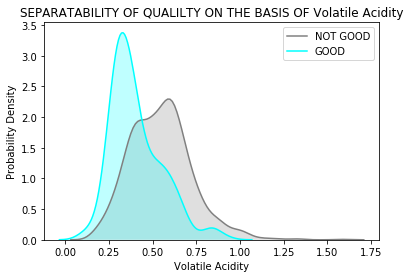

In [31]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['volatile acidity'], shade = True, color='grey', label="NOT GOOD")
sns.kdeplot(data_cls.loc[data_cls['good']==1]['volatile acidity'], shade = True, color='cyan', label="GOOD")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.ylabel("Probability Density")
plt.show()

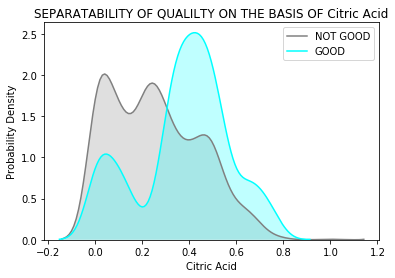

In [32]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['citric acid'], shade = True, color='grey', label="NOT GOOD")
sns.kdeplot(data_cls.loc[data_cls['good']==1]['citric acid'], shade = True, color='cyan', label="GOOD")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Citric Acid")
plt.xlabel("Citric Acid")
plt.ylabel("Probability Density")
plt.show()

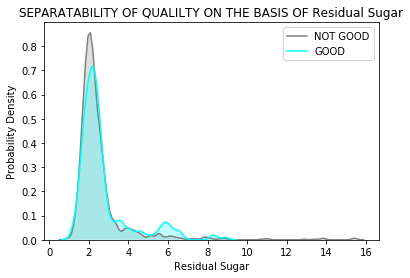

In [34]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['residual sugar'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['residual sugar'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Residual Sugar")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Residual Sugar")
plt.ylabel("Probability Density")
plt.show()

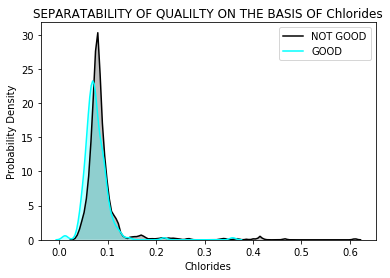

In [35]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['chlorides'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['chlorides'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Chlorides")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Chlorides")
plt.ylabel("Probability Density")
plt.show()

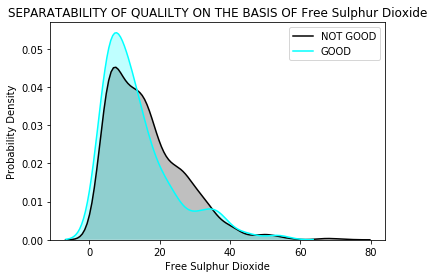

In [36]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['free sulfur dioxide'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['free sulfur dioxide'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Free Sulphur Dioxide")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Free Sulphur Dioxide")
plt.ylabel("Probability Density")
plt.show()

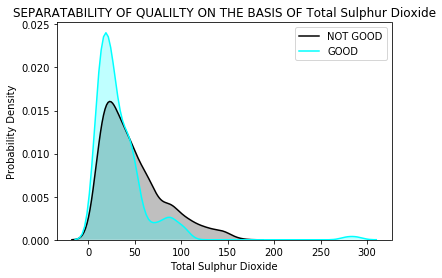

In [37]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['total sulfur dioxide'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['total sulfur dioxide'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Total Sulphur Dioxide")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Total Sulphur Dioxide")
plt.ylabel("Probability Density")
plt.show()

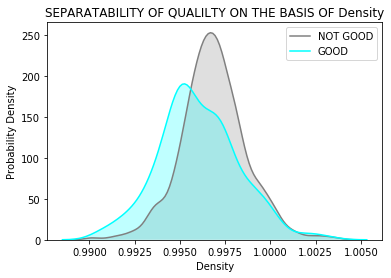

In [38]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['density'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['density'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Density")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Density")
plt.ylabel("Probability Density")
plt.show()

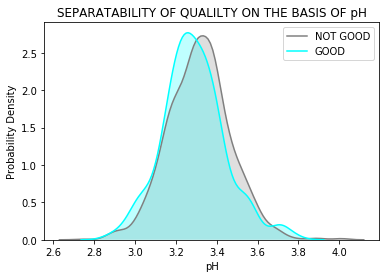

In [39]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['pH'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['pH'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("pH")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF pH")
plt.ylabel("Probability Density")
plt.show()

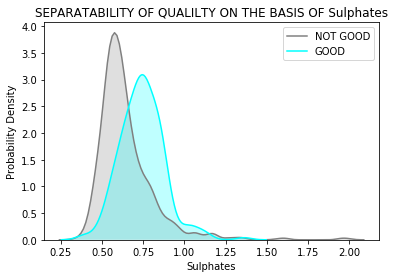

In [40]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['sulphates'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['sulphates'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Sulphates")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Sulphates")
plt.ylabel("Probability Density")
plt.show()

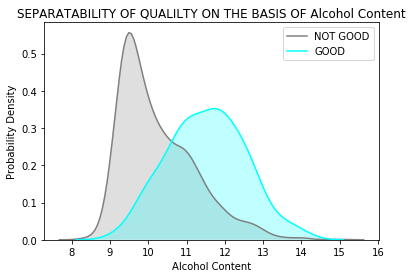

In [41]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['alcohol'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['alcohol'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Alcohol Content")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Alcohol Content")
plt.ylabel("Probability Density")
plt.show()

 - From the analysis of <b>probability distribution curves</b> it was noted that none of the variables had <b>clear distinguishing curves</b> which could separate the two types of classes
 - Hence, it was concluded that the final model had to <b>include all the features</b> of the dataset to be separable on the basis of the wine quality

## Preparing training and testing data

In [42]:
train_cls = data_cls.drop('good', axis=1)
y_cls = data_cls['good']

In [46]:
y_cls.value_counts()[1]

217

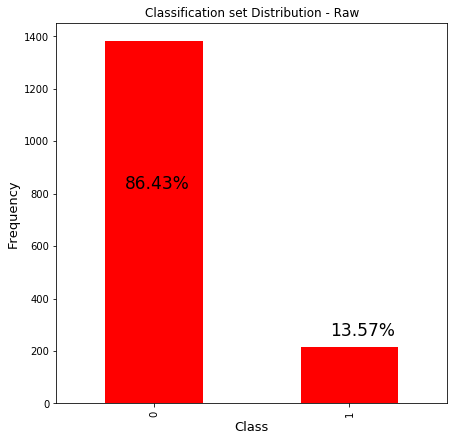

In [59]:
y_cls.value_counts().plot.bar(color='r', figsize=(7,7))
plt.xlabel("Class", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
zero = str(round((y_cls.value_counts()[0]/len(y_cls))*100, 2)) + "%"
ones = str(round((y_cls.value_counts()[1]/len(y_cls))*100, 2)) + "%"
plt.text(-0.150,820,zero, fontsize=17)
plt.text(0.90,260,ones, fontsize=17)
plt.title("Classification set Distribution - Raw")
plt.show()

 - The above graph shows that the set is <b>unbalanced</b> and thus the <b>normal accuracy of the model would not be a good metric for evaluation.</b>
 - This is because the model would be <b>more accurate in predicting the 0 class</b> than it would predict the 1 class

### Evaluation metrics chosen:
 - <b>F1 score</b>
 - <b>Precision</b>
 - <b>Recall</b>

In [61]:
def precision(orig, preds):
    tp = 0;
    fp = 0;
    for i,j in zip(orig, preds):
        if(i==j and i==1):
            tp+=1
            continue
        if(i==0 and j==1):
            fp+=1
            continue
    return round(tp/(tp+fp), 7)

In [62]:
def recall(orig, preds):
    tp = 0
    fn = 0
    for i,j in zip(orig, preds):
        if(i==j and i==1):
            tp+=1
            continue
        if(i==1 and j==0):
            fn+=1
            continue
    return round(tp/(tp+fn), 7)

In [63]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(train_cls, y_cls, train_size=0.8, random_state=42)

## Scaling the data for KNN classifier

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
std = StandardScaler()
std.fit(x_train_c)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
std_x_train = pd.DataFrame(std.transform(x_train_c), columns=x_train_c.columns)

In [74]:
std_x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.450408,0.387494,-1.394630,-0.456703,-0.617442,-1.054958,-1.113215,0.499144,-0.855116,-0.172018,-0.017201
1275,-0.071764,0.582801,-0.882784,-0.317352,-0.313264,0.885003,0.405199,-0.212363,-0.140623,0.515517,0.457957
1276,-0.651956,0.499098,-1.087522,0.100700,-0.232149,-0.084978,1.164407,0.369779,1.288361,-0.687670,-0.872484
1277,-0.245822,-1.844584,0.396831,-0.596054,-0.698557,-0.860962,-0.961374,-1.182601,0.054238,0.801991,1.408272


In [77]:
std_x_test = pd.DataFrame(std.transform(x_test_c), columns=x_test_c.columns)

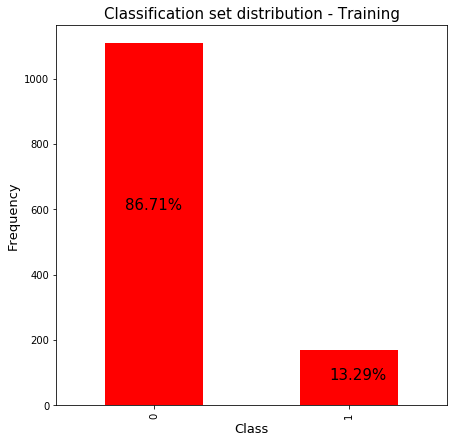

In [81]:
y_train_c.value_counts().plot.bar(color='r', figsize=(7,7))
plt.xlabel("Class", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
zero = str(round((y_train_c.value_counts()[0]/len(y_train_c))*100, 2)) + "%"
ones = str(round((y_train_c.value_counts()[1]/len(y_train_c))*100, 2)) + "%"
plt.text(-0.15, 600, zero, fontsize=15)
plt.text(0.90, 80, ones, fontsize=15)
plt.title("Classification set distribution - Training", fontsize=15)
plt.show()

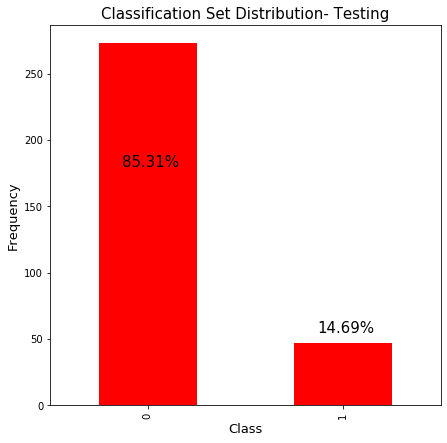

In [82]:
y_test_c.value_counts().plot.bar(color ='r',figsize=(7,7))
plt.xlabel("Class",fontsize = 13)
plt.ylabel("Frequency",fontsize=13)
zero = str(round((y_test_c.value_counts()[0]/len(y_test_c))*100,2))+"%"
ones = str(round((y_test_c.value_counts()[1]/len(y_test_c))*100,2))+"%"
plt.text(-0.13,180,zero,fontsize = 15)
plt.text(0.87,55,ones,fontsize=15)
plt.title("Classification Set Distribution- Testing",fontsize=15)
plt.show()

 - The above histograms show us that the data distribution in the training and test sets is same and thus we can go forward with the analysis with the classifier.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
corr_cols.append('residual sugar')

In [85]:
corr_cols.append('pH')

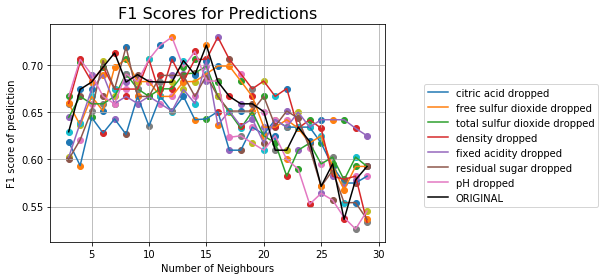

In [91]:
for c in corr_cols:
    f = []
    for i in range(3,30):
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
        knn.fit(std_x_train.drop(c, axis=1), y_train_c)
        preds = knn.predict(std_x_test.drop(c, axis=1))
        score = f1_score(y_test_c, preds)
        f.append(score)
        plt.scatter(i, score)
    plt.plot([i for i in range(3,30)], f, label= c + ' dropped')
    plt.legend()

# for original(without dropping anything)
original = []
for i in range(3,30):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
    knn.fit(std_x_train, y_train_c)
    preds = knn.predict(std_x_test)
    score = f1_score(y_test_c, preds)
    original.append(score)
    plt.scatter(i, score)
    
plt.plot([i for i in range(3,30)],original,color='black',label = 'ORIGINAL')
plt.legend(frameon=1,bbox_to_anchor = (1.1,0.75))
plt.title("F1 Scores for Predictions",fontsize = 16)
plt.xlabel("Number of Neighbours")
plt.ylabel("F1 score of prediction")
plt.grid()
        

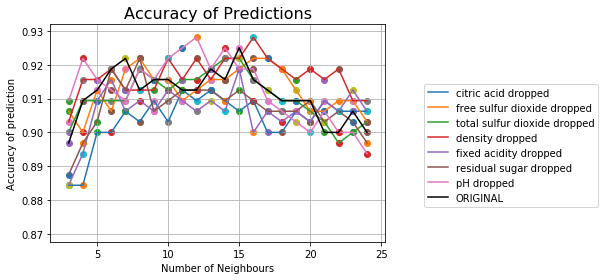

In [94]:
final = dict()
for c in corr_cols:
    f = []
    for i in range(3,25):
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
        knn.fit(std_x_train.drop(c, axis=1), y_train_c)
        preds = knn.predict(std_x_test.drop(c, axis=1))
        score = accuracy_score(y_test_c, preds)
        f.append(score)
        plt.scatter(i, score)
    final[c] = f
    plt.plot([i for i in range(3,25)], f, label= c + ' dropped')
    plt.legend()

# for original(without dropping anything)
original = []
for i in range(3,25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
    knn.fit(std_x_train, y_train_c)
    preds = knn.predict(std_x_test)
    score = accuracy_score(y_test_c, preds)
    original.append(score)
    plt.scatter(i, score)
    
plt.plot([i for i in range(3,25)],original,color='black',label = 'ORIGINAL')
plt.legend(frameon=1,bbox_to_anchor = (1.1,0.75))
plt.title("Accuracy of Predictions",fontsize = 16)
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy of prediction")
plt.grid()
        

## Analysis
 - It is noted that <b>dropping pH and the density from the data set actually improved upon the accuracy and the f1 score.</b>
 - Further from the correlation table, it was noted that <b>pH</b> had the weakest correlation amongst density and pH and hence in the final model, the <b>pH variable was dropped.</b>
 - Moreover, the best accuracy and f1 scores were encountered with <b>12 nearest neighbours</b>.
 
## Final model

<b> The final model is a KNN classifier with the following characteristics:</b>
 - Number of neighbours = 12
 - Variable dropped = pH
 - Distance metric = euclidean
 - Weighted - on the basis of distance

In [106]:
knn = KNeighborsClassifier(n_neighbors=12, n_jobs=-1, metric='euclidean', weights='distance')

In [107]:
knn.fit(std_x_train.drop('pH', axis=1), y_train_c)
preds = knn.predict(std_x_test.drop('pH', axis=1))

In [108]:
f1 = f1_score(y_test_c, preds)
accuracy = accuracy_score(y_test_c, preds)

### Confusion matrix

In [109]:
def show_labels(c):
    plt.text(0.4, 0.75, c[0][1], fontsize=15) ##True negatives
    plt.text(1.4,0.75,c[0][1],fontsize=15) ## False positives
    plt.text(0.4,1.25,c[1][0],fontsize=15) ## False Negatives
    plt.text(1.4,1.25,c[1][1],fontsize=15) ## True Positives

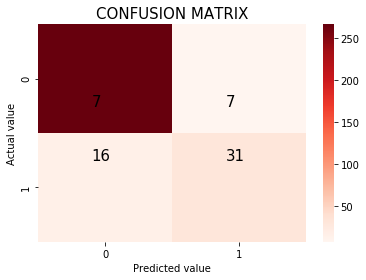

In [111]:
c1 = confusion_matrix(y_test_c, preds)
sns.heatmap(c1, cmap='Reds')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("CONFUSION MATRIX", fontsize=15)
show_labels(c1)
plt.show()

## Model scores

In [112]:
print("SCORES OF KNN CLASSIFIER MODEL NORMALIZED WITH Z1 NORMALISATION")
print("Recall of model: ", recall(y_test_c, preds))
print("Precision of model: ", precision(y_test_c, preds))
print("Accuracy of model: ", accuracy_score(y_test_c, preds))
print("F1 score of model: ", f1_score(y_test_c, preds))

SCORES OF KNN CLASSIFIER MODEL NORMALIZED WITH Z1 NORMALISATION
Recall of model:  0.6595745
Precision of model:  0.8157895
Accuracy of model:  0.928125
F1 score of model:  0.7294117647058823
